# Import Libraries

##Final Project : #
**Group - 6: Pavan Kumar Sakhireddy,
            L Uday Kumar Reddy,
            Koduru Sai Bhargav Ram.
            

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV

In [56]:
# Load the csv file
df  = pd.read_csv("/content/Cardiovascular_Disease_Dataset.csv")
df.head(10)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
5,148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1
6,168686,79,1,2,130,240,0,2,157,0,2.5,2,1,1
7,170498,52,1,0,127,345,0,0,192,1,4.9,1,0,0
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
9,192523,61,0,0,190,181,0,1,150,0,2.9,2,0,1


In [17]:
# Column names in the dataset
for cols in df.columns:
  print(cols)

patientid
age
gender
chestpain
restingBP
serumcholestrol
fastingbloodsugar
restingrelectro
maxheartrate
exerciseangia
oldpeak
slope
noofmajorvessels
target


In [18]:
# Shape (number of rows and columns) of the dataset
df.shape

(1000, 14)

In [19]:
# Size of the dataset
# Size = Rows * Columns
# Size = 1000 * 14
# Size = 14000
df.size

14000

In [20]:
# Information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [21]:
# Missing values in the dataset
df.isna().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [22]:
# Duplicate rows in the dataset
df.duplicated().sum()

0

In [23]:
# Dataset statistics
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


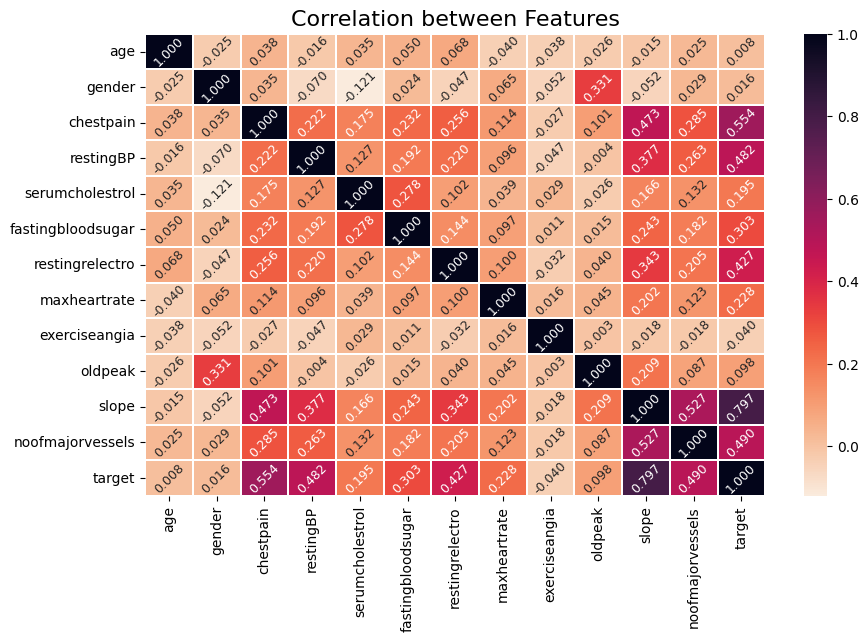

In [36]:
# Correaltion table
plt.figure(figsize=(10,6))
sns.heatmap(
            df.drop("patientid", axis=1).corr(),
            linewidths=0.05,
            annot=True,
            annot_kws={"size": 9, "rotation": 45},
            fmt=".3f",
            cmap="rocket_r",
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation between Features", fontsize=16)
plt.show()

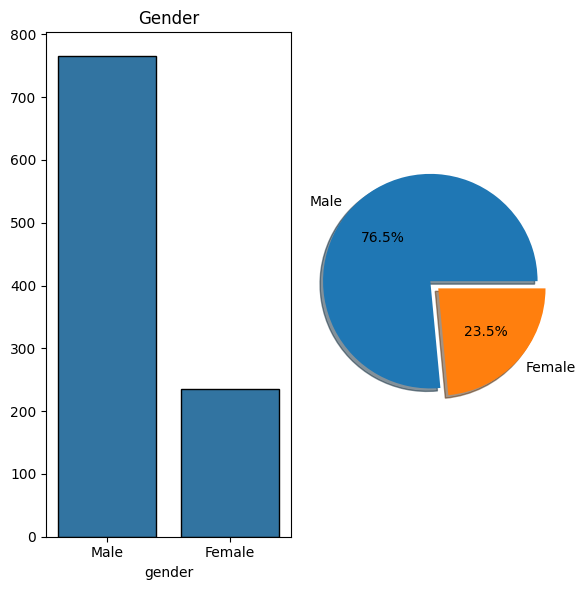

In [26]:
# Gender
label_col = df['gender'].replace({0:'Female',1:'Male'})
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
sns.barplot(x=label_col.value_counts().index,
            y=label_col.value_counts(),
            edgecolor='black')
plt.ylabel("")
plt.title("Gender")

plt.subplot(1,2,2)
plt.pie(label_col.value_counts(),
        explode=0.05 * np.ones(len(label_col.value_counts())),
        labels=label_col.value_counts().index,
        shadow=True,
        autopct='%0.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()

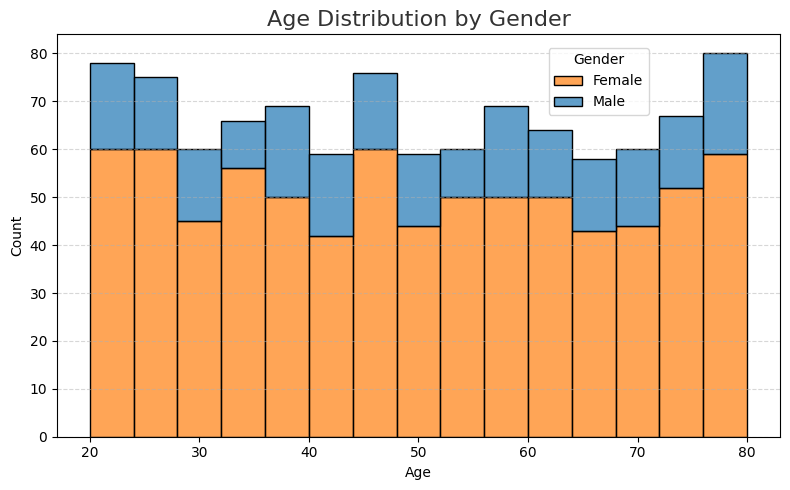

In [34]:
# Age distribution by gender
plt.figure(figsize=(8, 5))
sns.histplot(x='age', hue='gender', data=df, multiple='stack', bins=15, alpha=0.7)
plt.title('Age Distribution by Gender', fontsize=16, alpha=0.8)
plt.xlabel('Age')
plt.legend(title='Gender', labels=['Female', 'Male'], loc=(0.68,0.8))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

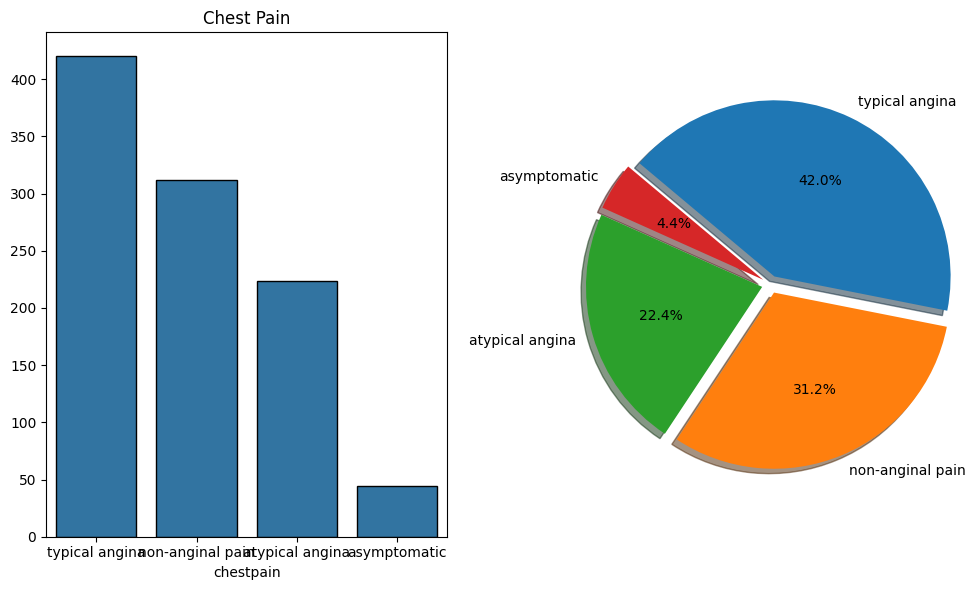

In [29]:
# Chest Pain
label_col = df['chestpain'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x=label_col.value_counts().index,
            y=label_col.value_counts(),
            edgecolor='black')
plt.ylabel("")
plt.title("Chest Pain")

plt.subplot(1,2,2)
value_counts = label_col.value_counts()
plt.pie(value_counts,
        explode=0.05 * np.ones(len(value_counts)),
        labels=value_counts.index,
        shadow=True,
        autopct='%0.1f%%',
        startangle=140,  # Rotate start angle to prevent overlap
        counterclock=False)  # Rotate labels clockwise
plt.axis('equal')
plt.tight_layout()
plt.show()


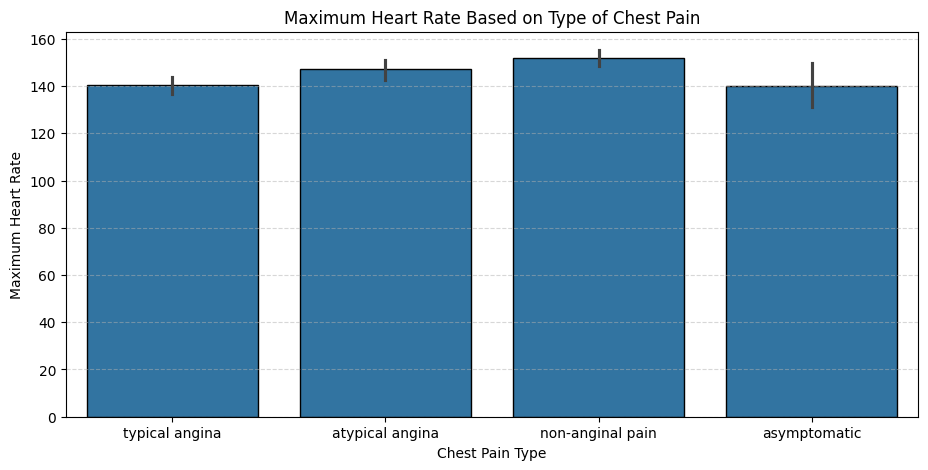

In [32]:
# Maximum heart rate based on type of chest pain
plt.figure(figsize=(11, 5))
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.barplot(x='chestpain',
            y='maxheartrate',
            data=df,
            edgecolor='black')
plt.title('Maximum Heart Rate Based on Type of Chest Pain')
plt.xticks([0,1,2,3], ['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

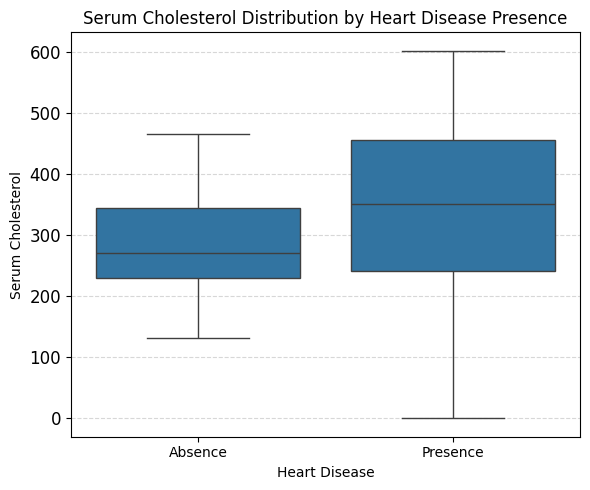

In [35]:
# Serum cholesterol distribution by heart disease presence
plt.figure(figsize=(6, 5))
sns.boxplot(x='target', y='serumcholestrol', data=df)
plt.title('Serum Cholesterol Distribution by Heart Disease Presence', fontsize=12)
plt.xlabel('Heart Disease')
plt.ylabel('Serum Cholesterol')
plt.xticks([0, 1], ['Absence', 'Presence'], fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

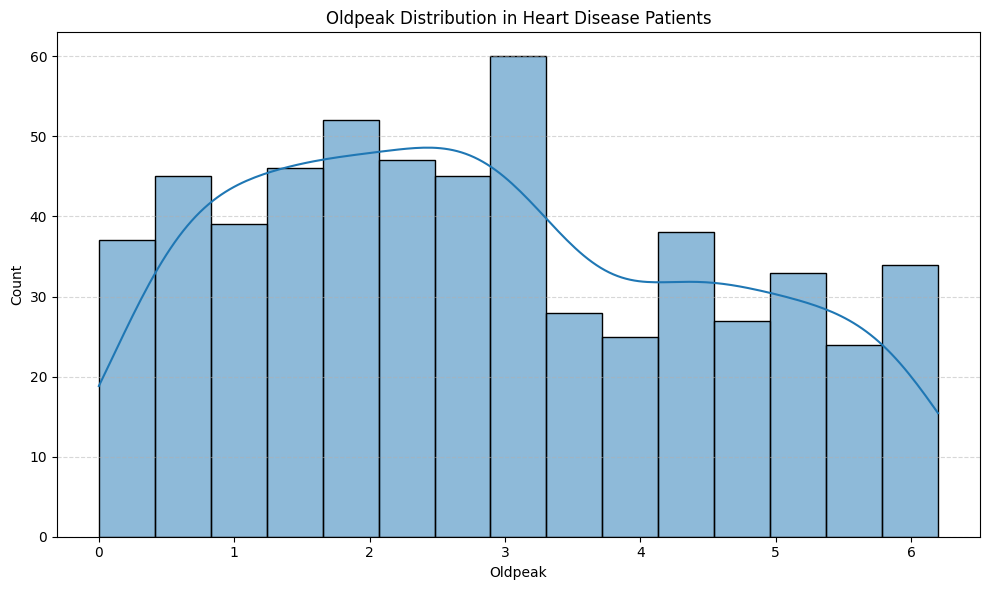

In [33]:
# Oldpeak distribution in heart disease patients
plt.figure(figsize=(10, 6))
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.histplot(x='oldpeak', data=df[df['target'] == 1], bins=15, kde=True)
plt.title('Oldpeak Distribution in Heart Disease Patients')
plt.xlabel('Oldpeak')
plt.tight_layout()
plt.show()

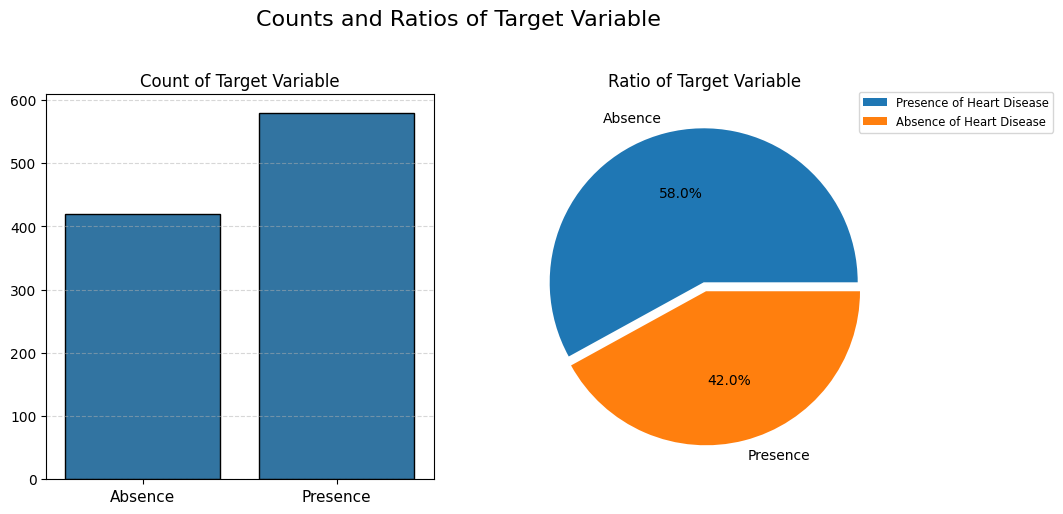

In [31]:
# Counts and ratios of target variable
plt.figure(figsize=(11, 5))
plt.subplot(1,2,1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.barplot(x=df['target'].value_counts().index,
            y=df['target'].value_counts(),
            edgecolor='black')
plt.xticks([0, 1], ["Absence", "Presence"], fontsize=11)
plt.title("Count of Target Variable", fontsize=12)
plt.xlabel("")
plt.ylabel("")

plt.subplot(1,2,2)
plt.pie(x=df['target'].value_counts(),
        labels=['Absence', 'Presence'],
        explode=[0.03,0.03],
        autopct="%0.1f%%",)
plt.title("Ratio of Target Variable", fontsize=12)
plt.legend(labels=["Presence of Heart Disease", "Absence of Heart Disease"],
           loc=(0.9,0.9), fontsize="small")

plt.suptitle("Counts and Ratios of Target Variable", fontsize=16, y=1.05)
plt.show()

In [38]:
# Independet or feature variable
X = df.drop(['patientid','target'], axis=1)
X.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,53,1,2,171,0,0,1,147,0,5.3,3,3
1,40,1,0,94,229,0,1,115,0,3.7,1,1
2,49,1,2,133,142,0,0,202,1,5.0,1,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2
4,31,1,1,199,0,0,2,136,0,5.3,3,2


In [39]:
# Dependent or target variable
y = df['target']
y.head()

0    1
1    0
2    0
3    1
4    1
Name: target, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Features of train set
X_train.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
541,71,1,2,186,544,1,1,150,1,4.3,3,3
440,70,1,1,196,404,1,0,130,1,1.2,3,1
482,77,1,0,110,254,0,0,186,0,2.0,1,1
422,36,1,1,132,307,0,0,175,0,5.3,0,0
778,76,1,2,135,325,0,0,120,0,2.3,0,0


In [42]:
# Features of test set
X_test.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
521,44,1,0,147,487,0,1,179,0,3.1,2,1
737,29,1,0,152,138,0,0,199,1,0.0,0,0
740,72,0,1,156,411,0,0,186,0,0.1,1,2
660,67,1,0,165,234,0,0,168,1,5.6,1,1
411,64,0,2,97,0,0,1,186,1,1.8,3,1


In [43]:
# Target of train set
y_train.head()

541    1
440    1
482    0
422    0
778    0
Name: target, dtype: int64

In [44]:
# Target of test set
y_test.head()

521    1
737    0
740    0
660    0
411    1
Name: target, dtype: int64

In [46]:
# Check for class imbalance
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print(f"\nClass Distribution: \n{class_counts}")


Class Distribution: 
{0: 282, 1: 418}


In [47]:
# Apply SMOTE for imbalanced data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [49]:
# Class imbalance
unique, counts = np.unique(y_train_resampled, return_counts=True)
class_counts = dict(zip(unique, counts))
print(f"\nClass Distribution: \n{class_counts}")


Class Distribution: 
{0: 418, 1: 418}


In [50]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Histogram Gradient Boosting Classifier": HistGradientBoostingClassifier(random_state=42)
}

# Perform cross-validation for each classifier
for name, clf in classifiers.items():
    # Cross-validation
    Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X_train_resampled, y_train_resampled, cv=Kfold, scoring='roc_auc')

    print(f"{name} Cross-Validation ROC AUC Scores: {scores}")
    print(f"\n{name} Mean ROC AUC: {scores.mean():.3f}")
    print("\n")

Logistic Regression Cross-Validation ROC AUC Scores: [0.98852041 0.9883821  0.98852553 0.98780838 0.98508319]

Logistic Regression Mean ROC AUC: 0.988


Support Vector Classifier Cross-Validation ROC AUC Scores: [0.78869048 0.91250717 0.87335055 0.83792312 0.79532415]

Support Vector Classifier Mean ROC AUC: 0.842


Decision Tree Classifier Cross-Validation ROC AUC Scores: [0.95238095 0.9702381  0.96995123 0.97597533 0.96392714]

Decision Tree Classifier Mean ROC AUC: 0.966


Random Forest Classifier Cross-Validation ROC AUC Scores: [0.99681122 0.99827883 0.99913941 0.9962708  0.99691624]

Random Forest Classifier Mean ROC AUC: 0.997


Histogram Gradient Boosting Classifier Cross-Validation ROC AUC Scores: [0.99730726 1.         0.99971314 0.99756168 0.99928285]

Histogram Gradient Boosting Classifier Mean ROC AUC: 0.999




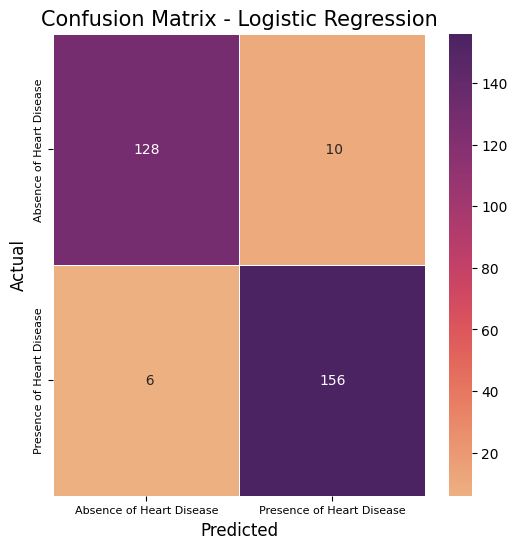

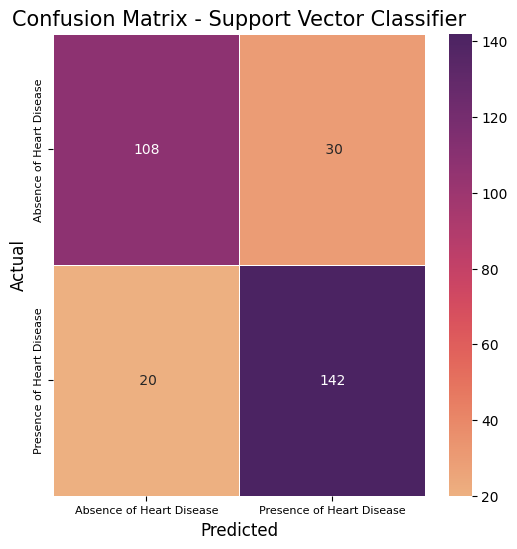

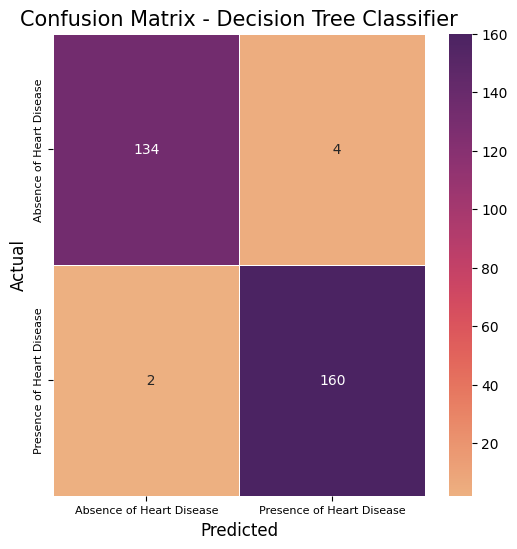

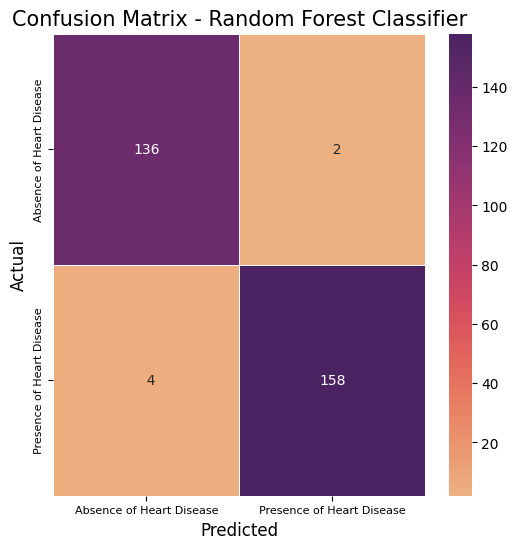

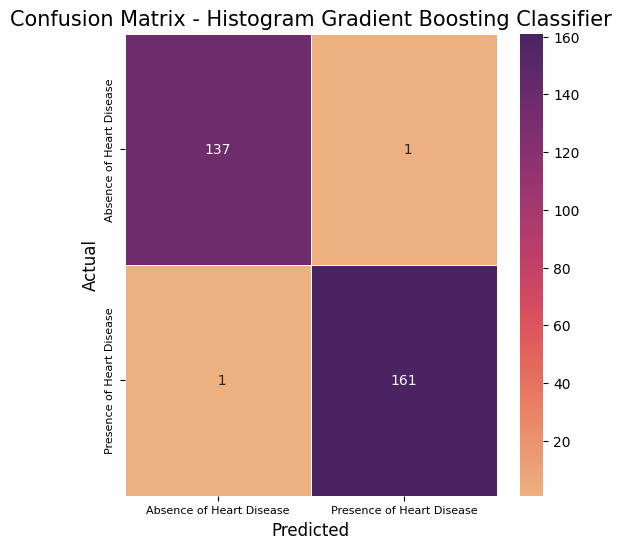

In [51]:
# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Histogram Gradient Boosting Classifier": HistGradientBoostingClassifier(random_state=42)
}

# Perform cross-validation for each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='3g', linewidths=0.6, cmap="flare")
    plt.title(f"Confusion Matrix - {name}", fontsize=15)
    plt.xticks(ticks=[0.5, 1.5], labels=["Absence of Heart Disease", "Presence of Heart Disease"], fontsize=8)
    plt.yticks(ticks=[0.5, 1.5], labels=["Absence of Heart Disease", "Presence of Heart Disease"], fontsize=8)
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)
    plt.show()


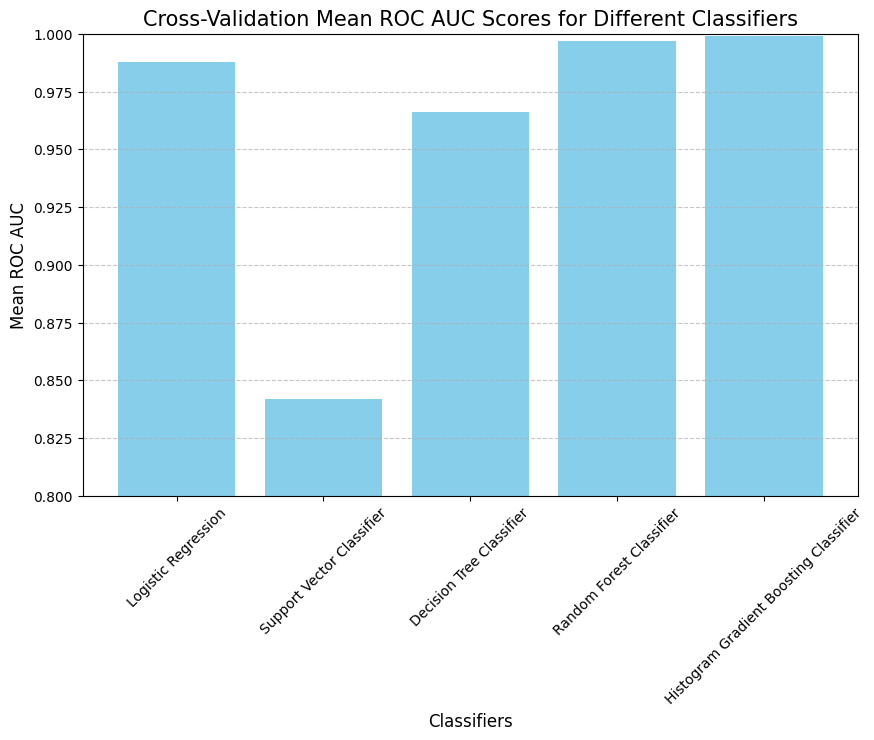

In [54]:
# Cross-validation ROC AUC scores
classifiers = [
    "Logistic Regression",
    "Support Vector Classifier",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "Histogram Gradient Boosting Classifier"
]

mean_roc_auc_scores = [0.988, 0.842, 0.966, 0.997, 0.999]  # Mean ROC AUC scores for each classifier

# Plot
plt.figure(figsize=(10, 6))
plt.bar(classifiers, mean_roc_auc_scores, color='skyblue')
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Mean ROC AUC', fontsize=12)
plt.title('Cross-Validation Mean ROC AUC Scores for Different Classifiers', fontsize=15)
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)  # Set y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
